The dataset consists of 6 columns:

mean_radius,mean_texture
,mean_perimeter
,mean_area
,mean_smoothness
,diagnosis，where radius, texture, perimeter, area, and smoothness are attributes of a breast lump and diagnosis is a binary parameter where 1 means a negative diagnosis and a 0 means a positive one for cancer cells.

In [9]:
import pandas as pd 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [5]:
breast_cancer_data = pd.read_csv('Breast_cancer_data.csv')

In [6]:
breast_cancer_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [11]:
count = breast_cancer_data.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

# Logistic Regression

In [ ]:
# y_target = breast_cancer_data['diagnosis']
features = ['mean_perimeter', 'mean_texture']
X_feature = breast_cancer_data[features]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.3, random_state = 42)

Binary classification using Logistic Regression
Logistic Regression is mostly used for binary classifications where the dependent variable(target) which are dichotomous in nature( yes or no).

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = model1.predict(X_test)

In [39]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc)

Accuracy score using Logistic Regression: 0.9239766081871345


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        63
           1       0.90      1.00      0.95       108

    accuracy                           0.93       171
   macro avg       0.95      0.90      0.92       171
weighted avg       0.94      0.93      0.93       171



In [23]:
from sklearn.metrics import roc_curve
y_pred_proba = model1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

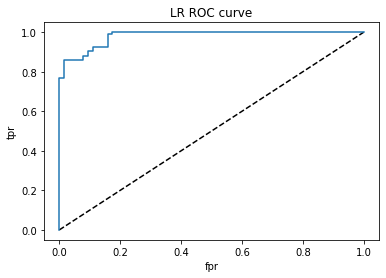

In [24]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='LR')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('LR ROC curve')
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9804526748971193

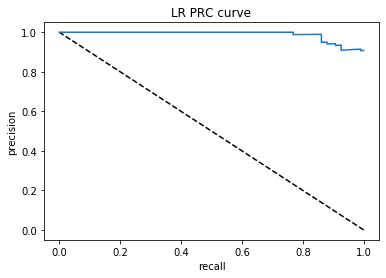

In [26]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall,precision, label='LR')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('LR PRC curve')
plt.show()

In [27]:
from sklearn.metrics import auc
area = auc(recall, precision)
area

0.9886020889942364

In [28]:
# precision score
from sklearn.metrics import average_precision_score
average_precision_score(y_test,y_pred_proba)

0.9886551861268689

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
y_pred = knn.predict(X_test)

In [43]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc)


Accuracy score using KNN: 0.9239766081871345


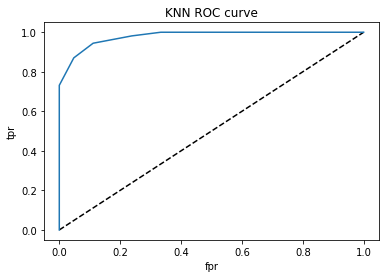

In [44]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9790564373897708

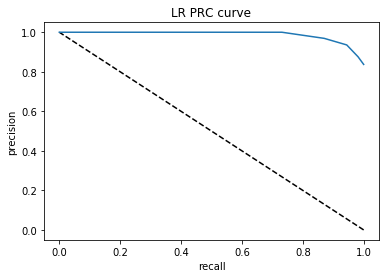

In [36]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall,precision, label='LR')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('LR PRC curve')
plt.show()

In [37]:
from sklearn.metrics import auc
area = auc(recall, precision)
area

0.9881881228876768

In [38]:
# precision score
from sklearn.metrics import average_precision_score
average_precision_score(y_test,y_pred_proba)

0.9833414059480835